##  Method 3-B -> Measure of central tendency for each class MODE

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
# to read the online data or drive link
# use -> us?export=download& inplace of open?

df=pd.read_csv(r"C:\Users\lalit\Documents\JUPYTER NOTEBOOK\house-prices-advanced-regression-techniques\train.csv")
# dataset link -> https://drive.google.com/drive/folders/1gdfNSb3ptz0WvShshUeiM-kqfMYzQ5tm?usp=sharing

In [3]:
# show all rows and columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
# print only the categorical data
cat_vars = df.select_dtypes(include='object')
cat_vars.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [5]:
cat_vars.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [6]:
# percentage data missing
miss_val_per = cat_vars.isnull().mean()*100
miss_val_per

MSZoning          0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinType2      2.602740
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.068493
KitchenQual       0.000000
Functional        0.000000
FireplaceQu      47.260274
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageCond        5.547945
P

In [7]:
# list columns having more than 20% missing data
drop_vars=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']
cat_vars.drop(columns=drop_vars, axis=1, inplace=True)
cat_vars.shape

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(1460, 38)

In [8]:
# names of columns still having misisng values 
isnull_per=cat_vars.isnull().mean()*100
miss_vars = isnull_per[isnull_per >0].keys()
miss_vars

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [9]:
# fill data in missing place with 'Missing' word
cat_vars['MasVnrType'].fillna('Missing')

0       BrkFace
1          None
2       BrkFace
3          None
4       BrkFace
5          None
6         Stone
7         Stone
8          None
9          None
10         None
11        Stone
12         None
13        Stone
14      BrkFace
15         None
16      BrkFace
17         None
18         None
19         None
20      BrkFace
21         None
22      BrkFace
23         None
24         None
25        Stone
26         None
27        Stone
28         None
29         None
30         None
31         None
32         None
33         None
34      BrkFace
35        Stone
36         None
37      BrkFace
38         None
39         None
40      BrkFace
41         None
42         None
43         None
44         None
45      BrkFace
46         None
47         None
48         None
49         None
50         None
51         None
52         None
53         None
54         None
55      BrkFace
56      BrkFace
57         None
58      BrkFace
59         None
60         None
61         None
62      

In [10]:
# find the mode value
cat_vars['MasVnrType'].mode()

0    None
dtype: object

In [11]:
# count of each sub category 
cat_vars['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [12]:
# fill the missing data with the mode value 
# mode from 0 row
cat_vars['MasVnrType'].fillna(cat_vars['MasVnrType'].mode()[0])

0       BrkFace
1          None
2       BrkFace
3          None
4       BrkFace
5          None
6         Stone
7         Stone
8          None
9          None
10         None
11        Stone
12         None
13        Stone
14      BrkFace
15         None
16      BrkFace
17         None
18         None
19         None
20      BrkFace
21         None
22      BrkFace
23         None
24         None
25        Stone
26         None
27        Stone
28         None
29         None
30         None
31         None
32         None
33         None
34      BrkFace
35        Stone
36         None
37      BrkFace
38         None
39         None
40      BrkFace
41         None
42         None
43         None
44         None
45      BrkFace
46         None
47         None
48         None
49         None
50         None
51         None
52         None
53         None
54         None
55      BrkFace
56      BrkFace
57         None
58      BrkFace
59         None
60         None
61         None
62      

In [13]:
# check the mode value of each column that will be inserted
cat_vars_copy= cat_vars.copy() #copy the data

for var in miss_vars:
    cat_vars_copy[var].fillna(cat_vars[var].mode()[0],inplace=True)
    print(var,"=",cat_vars[var].mode()[0])

MasVnrType = None
BsmtQual = TA
BsmtCond = TA
BsmtExposure = No
BsmtFinType1 = Unf
BsmtFinType2 = Unf
Electrical = SBrkr
GarageType = Attchd
GarageFinish = Unf
GarageQual = TA
GarageCond = TA


In [14]:
cat_vars_copy.isnull().sum().sum()

0

## Data Distribution

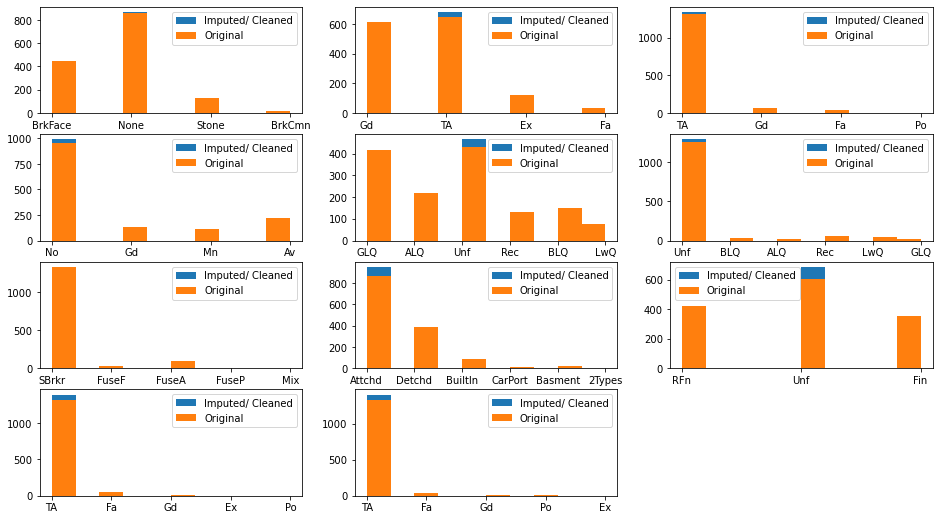

In [15]:

plt.figure(figsize=(16,9))
for i,var in enumerate(miss_vars):
    plt.subplot(4,3,i+1)
    plt.hist(cat_vars_copy[var],label="Imputed/ Cleaned")
    plt.hist(cat_vars[var].dropna(),label="Original")
    plt.legend()

In [16]:
# update the data
df.update(cat_vars_copy)
df.drop(columns=drop_vars,inplace=True)

In [17]:
# check data updated or not
df.select_dtypes(include='object').isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64